In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [18]:
df=pd.read_csv('total-electricity-consumption-us.csv')

In [19]:
df.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [20]:
df.shape

(51, 2)

In [21]:
#checking NA null values
#no missing values
df.isnull().any()

Year           False
Consumption    False
dtype: bool

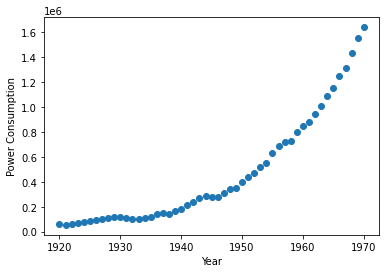

In [22]:
#as we can see the y is related to its feature in a linear fashion.
fig,ax=plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Power Consumption")
ax.scatter(df.Year,df.Consumption)

In [23]:
size=len(df.index)
index=range(0,size,5)
train=df[~df.index.isin(index)]
test=df[df.index.isin(index)]

In [24]:
print(len(train))
print(len(test))

40
11


In [29]:
X_train=train.Year.values.reshape(-1,1)
y_train=train.Consumption

X_test=test.Year.values.reshape(-1,1)
y_test=test.Consumption

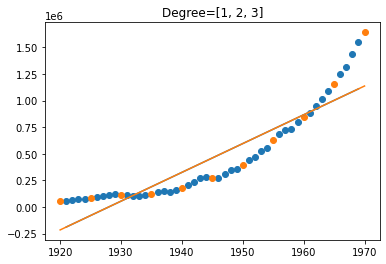

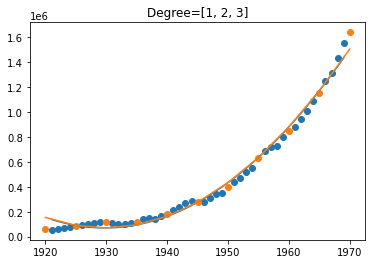

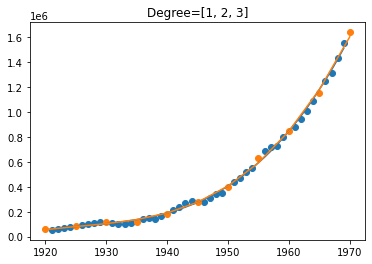

In [31]:
#converting X to a 2 dimensional array .
r2_train=[]
r2_test=[]
degrees=[1,2,3]
for degree in degrees:
    pipeline=Pipeline([('poly_features',PolynomialFeatures(degree=degree)),('model',LinearRegression())])
    pipeline.fit(X_train,y_train)
    y_pred=pipeline.predict(X_test)
    r2_test.append(metrics.r2_score(y_test,y_pred))
    
    #training performance
    y_pred_train=pipeline.predict(X_train)
    r2_train.append(metrics.r2_score(y_train,y_pred_train))
#plot predictions and actual values against year

    fig,ax=plt.subplots()
    ax.set_label("Year")
    ax.set_label("Consumption")
    ax.set_title("Degree="+str(degrees))
#train data in blue
    ax.scatter(X_train,y_train)
    ax.plot(X_train,y_pred_train)
    
#test data
    ax.scatter(X_test,y_test)
    ax.plot(X_test,y_pred)
    
    plt.show()


In [32]:
# respective test r-squared scores of predictions
print(degrees)
print(r2_train)
print(r2_test)

[1, 2, 3]
[0.8423747402176137, 0.990889674455328, 0.9979789884378975]
[0.816517046382681, 0.9876080502746136, 0.9984899918575911]
